In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2 as pg
from sqlalchemy import create_engine
%matplotlib inline

In [2]:
conn = pg.connect(host="0.0.0.0", user="user", password=123456, port="5433", dbname="warehouse")

In [3]:
PAST_HOURS = 36

In [4]:
df_cities = pd.read_sql_query("SELECT * FROM tbl_cities", conn)

df_rain = pd.read_sql_query("""SELECT tbl_cities.city_name, grouped_table.sum FROM 
(SELECT city_id, SUM(precipitation) FROM tbl_hour_city_conditions 
WHERE observation_date BETWEEN (NOW() - INTERVAL '{} hour') AND NOW()
GROUP BY city_id) AS grouped_table
JOIN tbl_cities ON tbl_cities.id = grouped_table.city_id""".format(PAST_HOURS), conn)

df_temps = pd.read_sql_query("""SELECT tbl_cities.elevation, tbl_cities.city_name, grouped_table.avg FROM 
(SELECT city_id, AVG(daily_temperature_amplitude) FROM tbl_daily_city_conditions 
GROUP BY city_id) AS grouped_table
JOIN tbl_cities ON tbl_cities.id = grouped_table.city_id""", conn)

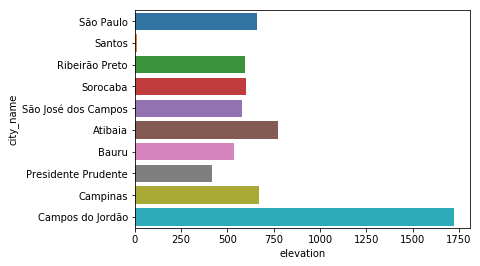

In [5]:
#A visualização mostra que dentre as cidades analisadas, a com maior altitude é Campos do Jordão
sns.barplot(y="city_name", x="elevation", data=df_cities)

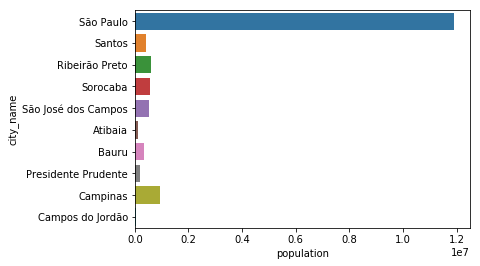

In [6]:
#A visualização mostra que dentre as cidades analisadas, a com menor população é Campos do Jordão
sns.barplot(y="city_name", x="population", data=df_cities)

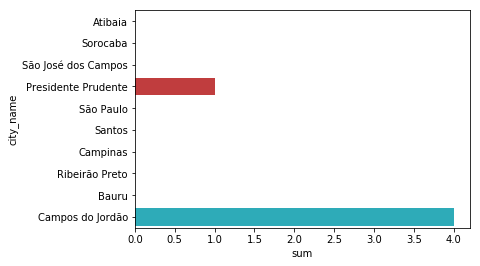

In [7]:
#A visualização mostra o agregado da soma de precipitação ocorrente em todas as cidades no dia 04/05/2019
#Para alterar essa janela de tempo é necessário alterar o valor da variável PAST_HOURS presente na segunda célula,
#e executar a terceira célular novemnte (refazer as queries)

sns.barplot(y="city_name", x="sum", data=df_rain)

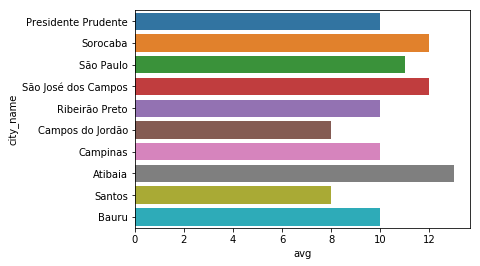

In [8]:
#A visualização mostra a amplitude diária média por cidade dos dados diários coletados no dia 04/05/2019
sns.barplot(y="city_name", x="avg", data=df_temps)

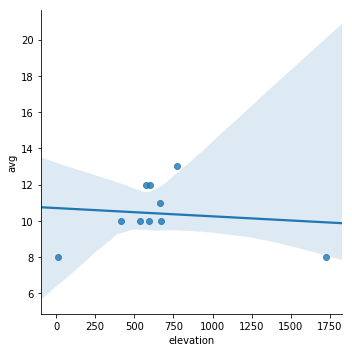

In [9]:
#A visualização mostra que para a data considerada, não há uma correlação clara entre elevação da cidade e amplitude térmica
sns.lmplot(x="elevation", y="avg", data=df_temps)